In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import optim

from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
traindata = dataset.NYU_Depth(mode = 'train', transform = None)
valdata = dataset.NYU_Depth(mode = 'validation', transform = None)
traindataloader = DataLoader(traindata, batch_size = 4)
valdataloader = DataLoader(valdata, batch_size = 16)
l = loss.MixedLoss()

## Train with pretrained backbone(Densenet)

In [ ]:
depthnet = model.DepthNet()
optimizer = optim.Adam(depthnet.parameters(), lr = 0.0001)
train.train(unet, traindataloader, valdataloader, 100, optimizer, l, device)

## Load the trained model

In [2]:
depthnet = torch.load('depthnet.torch').float().cuda()

## Test

In [3]:
testdata = dataset.NYU_Depth(mode = 'test', transform = None)

In [52]:
evaluate.evaluate(depthnet, testdata, device)

(0.504251806640625,
 0.8941748697916667,
 0.990207666015625,
 0.21010970849479071,
 0.7609836652013966,
 0.10367530631184788)

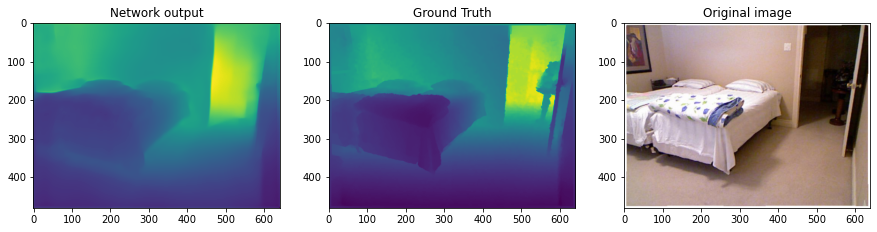

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [25]:
with torch.no_grad():
    img, gt = testdata[17]
    depthmap = depthnet(torch.tensor(img).view([1, 3, 480, 640]).float().cuda())
    depthmap = depthmap.detach().cpu().numpy()[0,0]
    
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    f.set_figheight(15)
    f.set_figwidth(15)
    ax1.imshow(depthmap)
    ax1.set_title("Network output")
    ax2.imshow(gt)
    ax2.set_title("Ground Truth")
    ax3.imshow(img.transpose([1,2,0]))
    ax3.set_title("Original image")
    plt.show()
    
    utils.betterscatter(img, depthmap)